# Data cleaning

# Predicting School-Age Digital Connectivity

# Table of Contents
1. [Introduction](#itr)
    1. [Dataset Source](#dataset-source)
    2. [Dataset Details](#dataset-details)
    3. [Dataset Features](#dataset-features)
    4. [Target Feature](#target-feature)
2. [Goals & Objectives](#g&o)
3. [Data Cleaning & Preprocessing](#data-cleaning--preprocessing)
    1. [Handling Missing Values](#handling-missing-values)
    2. [Removing Duplicates](#removing-duplicates)
    3. [Correcting Data Types](#correcting-data-types)
    4. [Handling Outliers](#handling-outliers)
4. [Data Exploration & Visualization](#data-exploration--visualization)
    1. [Descriptive Statistics](#descriptive-statistics)
    2. [Visualization](#visualization)
    3. [Correlation Analysis](#correlation-analysis)
5. [Literature Review](#literature-review)
6. [Summary & Conclusions](#summary--conclusions)
7. [References](#references)

## Introduction <a id='itr'></a>

In the modern digital era, e-commerce has revolutionized the way businesses operate and how consumers purchase goods. The dataset "E-Commerce Trends: A Guide to Leveraging Data" provides a comprehensive look at various factors influencing sales on an e-commerce platform. This dataset is crucial for understanding consumer behavior, identifying sales trends, and optimizing business strategies. The data includes information on product categories, prices, ratings, reviews, stock quantities, discounts, sales, and more, providing a rich source of information for analysis and decision-making.

Dataset Details
The e-commerce dataset consists of several features that capture various aspects of product performance and customer interactions:

ProductID: A unique identifier for each product.
ProductName: The name of the product.
Category: The category to which the product belongs.
Price: The price of the product.
Rating: The average customer rating of the product.
NumReviews: The number of reviews received by the product.
StockQuantity: The quantity of the product available in stock.
Discount: The discount applied to the product.
Sales: The number of units sold (target variable).
DateAdded: The date when the product was added to the platform.
City: The city where the product is sold.
The dataset includes thousands of observations that capture the sales dynamics of various products over time and across different regions. By analyzing these features, we can uncover patterns and trends that drive sales, helping businesses make informed decisions to boost their performance in the competitive e-commerce landscape.

Dataset Source
The dataset, titled "E-Commerce Trends: A Guide to Leveraging Data," is available on Kaggle, a platform known for providing high-quality datasets for data science and machine learning projects. The dataset was uploaded by Muhammad Roshann Riaz and can be accessed through the following link: E-Commerce Trends Dataset on Kaggle.

Citation:
Riaz, M. R. (2023). E-Commerce Trends: A Guide to Leveraging Data. Retrieved from Kaggle.

**Target Feature and Its Details**
The target feature in this analysis is Sales, which represents the number of units sold for each product. This variable is a key performance indicator in the e-commerce industry as it directly measures the success and popularity of products on the platform. Understanding and predicting sales can provide valuable insights for improving inventory management, pricing strategies, marketing efforts, and overall business growth.

**Characteristics of the Target Feature:**
Data Type: Numeric (Integer)
Unit: Number of units sold
Range: 0 to potentially a very high number, depending on the product's popularity and demand
Importance of the Target Feature:
Performance Measurement: Sales figures are essential for measuring the performance of individual products and categories. High sales volumes indicate popular and successful products, while low sales volumes may suggest the need for marketing adjustments or product improvements.

Inventory Management: Accurate sales data helps businesses manage inventory levels more effectively. Understanding sales trends allows for better forecasting, ensuring that popular products are sufficiently stocked to meet demand and reducing the risk of overstocking or stockouts.

Pricing Strategies: Analyzing sales data in relation to pricing can help businesses optimize their pricing strategies. Identifying the price points that maximize sales can lead to increased revenue and competitive advantage.

Marketing and Promotions: Sales data can inform the effectiveness of marketing campaigns and promotional activities. By correlating sales spikes with specific marketing efforts or discount offers, businesses can refine their marketing strategies to drive higher sales.

Customer Insights: Sales data provides insights into customer preferences and purchasing behavior. By understanding which products are most popular, businesses can tailor their offerings to better meet customer needs and preferences

## Goal and Objective<a id='g&o'></a>

Goal
The primary goal of this project is to analyze and predict the sales of products on an e-commerce platform. By leveraging data on various factors influencing sales, we aim to gain a comprehensive understanding of sales dynamics and develop predictive models to forecast future sales. This will enable the e-commerce business to make informed decisions, optimize operations, and enhance profitability and customer satisfaction.

Objectives
The objectives of this project are as follows:

First, we aim to understand the distribution of sales across different products, categories, and regions. By analyzing sales data, we seek to identify patterns and trends that reveal which products are most popular and why. This understanding will provide a foundation for further analysis.

Second, we aim to identify the key factors that influence sales. Factors such as product price, customer ratings, number of reviews, stock quantity, discounts, and the date the product was added to the platform will be examined. Using statistical and machine learning techniques, we will quantify the impact of these factors on sales.

Third, we aim to develop predictive models to forecast future sales based on historical data and the identified influencing factors. Models such as linear regression, decision trees, and random forests will be employed to achieve accurate sales predictions.

Fourth, we aim to provide data-driven insights and recommendations to optimize business strategies. This includes optimizing inventory management to ensure popular products are adequately stocked, developing pricing strategies to maximize sales and profitability, and evaluating the effectiveness of marketing campaigns and promotional activities.

Finally, we aim to enhance customer satisfaction by understanding customer preferences and behavior through the analysis of sales data in conjunction with product ratings and reviews. By tailoring product offerings and marketing strategies to better meet customer needs, we can improve the overall shopping experience on the platform.

By achieving these objectives, the project seeks to offer actionable insights that will help the e-commerce business improve performance, streamline operations, and provide a better shopping experience for customers, ultimately driving growth and profitability in the competitive e-commerce market.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import io
import requests

pd.set_option('display.max_columns', None) 

###
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
###

In [2]:

data = pd.read_csv("ecommerce_product_dataset.csv")
print(data.head(10))

   ProductID ProductName     Category   Price  Rating  NumReviews  \
0          1  Headphones  Electronics  400.31     1.7        3772   
1          2  Headphones  Electronics  235.03     2.3        2919   
2          3  Smartwatch  Electronics  417.90     1.8        1184   
3          4  Smartphone  Electronics  152.70     3.4        2047   
4          5      Laptop  Electronics  394.74     1.8        1267   
5          6  Headphones  Electronics   93.56     1.3        2435   
6          7      Laptop  Electronics   57.86     3.7        1478   
7          8      Laptop  Electronics  201.62     1.7        3073   
8          9  Smartphone  Electronics  485.10     4.1         161   
9         10  Smartwatch  Electronics  170.00     3.3        1275   

   StockQuantity  Discount  Sales   DateAdded         City  
0             20      0.08    466  2023-11-10  Albuquerque  
1            663      0.33   1332  2023-09-28       Queens  
2            459      0.31    252  2023-10-20       Austi

In [3]:
# Set the 'ProductID' column as the index
data.set_index('ProductID', inplace=True)

print(data.head())

          ProductName     Category   Price  Rating  NumReviews  StockQuantity  \
ProductID                                                                       
1          Headphones  Electronics  400.31     1.7        3772             20   
2          Headphones  Electronics  235.03     2.3        2919            663   
3          Smartwatch  Electronics  417.90     1.8        1184            459   
4          Smartphone  Electronics  152.70     3.4        2047            475   
5              Laptop  Electronics  394.74     1.8        1267            831   

           Discount  Sales   DateAdded         City  
ProductID                                            
1              0.08    466  2023-11-10  Albuquerque  
2              0.33   1332  2023-09-28       Queens  
3              0.31    252  2023-10-20       Austin  
4              0.49   1806  2023-12-05       Dallas  
5              0.23   1508  2023-08-10       Tucson  


In [4]:
# Check for missing values
missing_values = data.isnull().sum()
print(f"Missing values in each column:\n{missing_values}")

Missing values in each column:
ProductName      0
Category         0
Price            0
Rating           0
NumReviews       0
StockQuantity    0
Discount         0
Sales            0
DateAdded        0
City             0
dtype: int64


In [5]:
data.dtypes

ProductName       object
Category          object
Price            float64
Rating           float64
NumReviews         int64
StockQuantity      int64
Discount         float64
Sales              int64
DateAdded         object
City              object
dtype: object

As I see every data type is in correct format except date so, I format date in correct data format

In [6]:
# Convert 'DateAdded' to datetime
data['DateAdded'] = pd.to_datetime(data['DateAdded'], format='%Y-%m-%d')


In [7]:
# Loop through each column and print the unique values
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Unique values in {column}:\n{unique_values}\n")


Unique values in ProductName:
['Headphones' 'Smartwatch' 'Smartphone' 'Laptop' 'Jacket' 'Sweater'
 'T-Shirt' 'Jeans' 'Coffee Maker' 'Microwave' 'Blender' 'Toaster'
 'Biography' 'Fantasy Book' 'Science Book' 'Novel' 'Board Game' 'Puzzle'
 'Action Figure' 'Toy Car' 'Fish Oil' 'Protein Powder' 'Vitamin D'
 'Multivitamin' 'Sunscreen' 'Cleanser' 'Moisturizer' 'Toner' 'Mascara'
 'Blush' 'Lipstick' 'Foundation' 'Denim Jacket' 'Rain Jacket'
 'Leather Jacket' 'Winter Coat' 'Road Bike' 'Mountain Bike' 'Hybrid Bike'
 'Electric Bike' 'Sketchbook' 'Brushes' 'Paint Set' 'Canvas' 'Coffee Mug'
 'Water Bottle' 'Tea Cup' 'Wine Glass' 'Eau de Toilette' 'Body Spray'
 'Perfume Oil' 'Eau de Parfum' 'White Wine' 'Rose Wine' 'Red Wine'
 'Sparkling Wine' 'Knee-High Socks' 'Ankle Socks' 'Wool Socks'
 'Cotton Socks' 'Silk Sheets' 'Linen Sheets' 'Bamboo Sheets'
 'Cotton Sheets' 'Framed Poster' 'Canvas Print' 'Art Print' 'Digital Art'
 'Soy Candle' 'Beeswax Candle' 'Scented Candle' 'Pillar Candle'
 'Body Lotion' '

In [8]:
# Convert object type columns to lower case and remove leading/trailing white spaces
for column in data.select_dtypes(include='object').columns:
    data[column] = data[column].str.lower().str.strip()

# Convert 'DateAdded' to datetime format correctly and format to show only date, month, and year
data['DateAdded'] = pd.to_datetime(data['DateAdded'], errors='coerce').dt.strftime('%Y-%m-%d')

In [9]:
# Loop through each column and print the unique values
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Unique values in {column}:\n{unique_values}\n")


Unique values in ProductName:
['headphones' 'smartwatch' 'smartphone' 'laptop' 'jacket' 'sweater'
 't-shirt' 'jeans' 'coffee maker' 'microwave' 'blender' 'toaster'
 'biography' 'fantasy book' 'science book' 'novel' 'board game' 'puzzle'
 'action figure' 'toy car' 'fish oil' 'protein powder' 'vitamin d'
 'multivitamin' 'sunscreen' 'cleanser' 'moisturizer' 'toner' 'mascara'
 'blush' 'lipstick' 'foundation' 'denim jacket' 'rain jacket'
 'leather jacket' 'winter coat' 'road bike' 'mountain bike' 'hybrid bike'
 'electric bike' 'sketchbook' 'brushes' 'paint set' 'canvas' 'coffee mug'
 'water bottle' 'tea cup' 'wine glass' 'eau de toilette' 'body spray'
 'perfume oil' 'eau de parfum' 'white wine' 'rose wine' 'red wine'
 'sparkling wine' 'knee-high socks' 'ankle socks' 'wool socks'
 'cotton socks' 'silk sheets' 'linen sheets' 'bamboo sheets'
 'cotton sheets' 'framed poster' 'canvas print' 'art print' 'digital art'
 'soy candle' 'beeswax candle' 'scented candle' 'pillar candle'
 'body lotion' '

In [10]:
# Summary statistics for each numerical column
summary_statistics = data.describe()
print(summary_statistics)

            Price       Rating   NumReviews  StockQuantity     Discount  \
count  1000.00000  1000.000000  1000.000000    1000.000000  1000.000000   
mean    253.77551     3.025600  2498.753000     495.395000     0.251640   
std     141.40362     1.151004  1463.241871     292.799253     0.146455   
min      10.11000     1.000000     3.000000       0.000000     0.000000   
25%     133.09250     2.100000  1201.750000     241.750000     0.130000   
50%     251.31000     3.100000  2476.000000     505.000000     0.250000   
75%     375.82750     4.000000  3797.500000     743.500000     0.380000   
max     499.74000     5.000000  4994.000000     993.000000     0.500000   

             Sales  
count  1000.000000  
mean   1011.037000  
std     582.113466  
min       0.000000  
25%     502.000000  
50%     998.000000  
75%    1540.000000  
max    1997.000000  


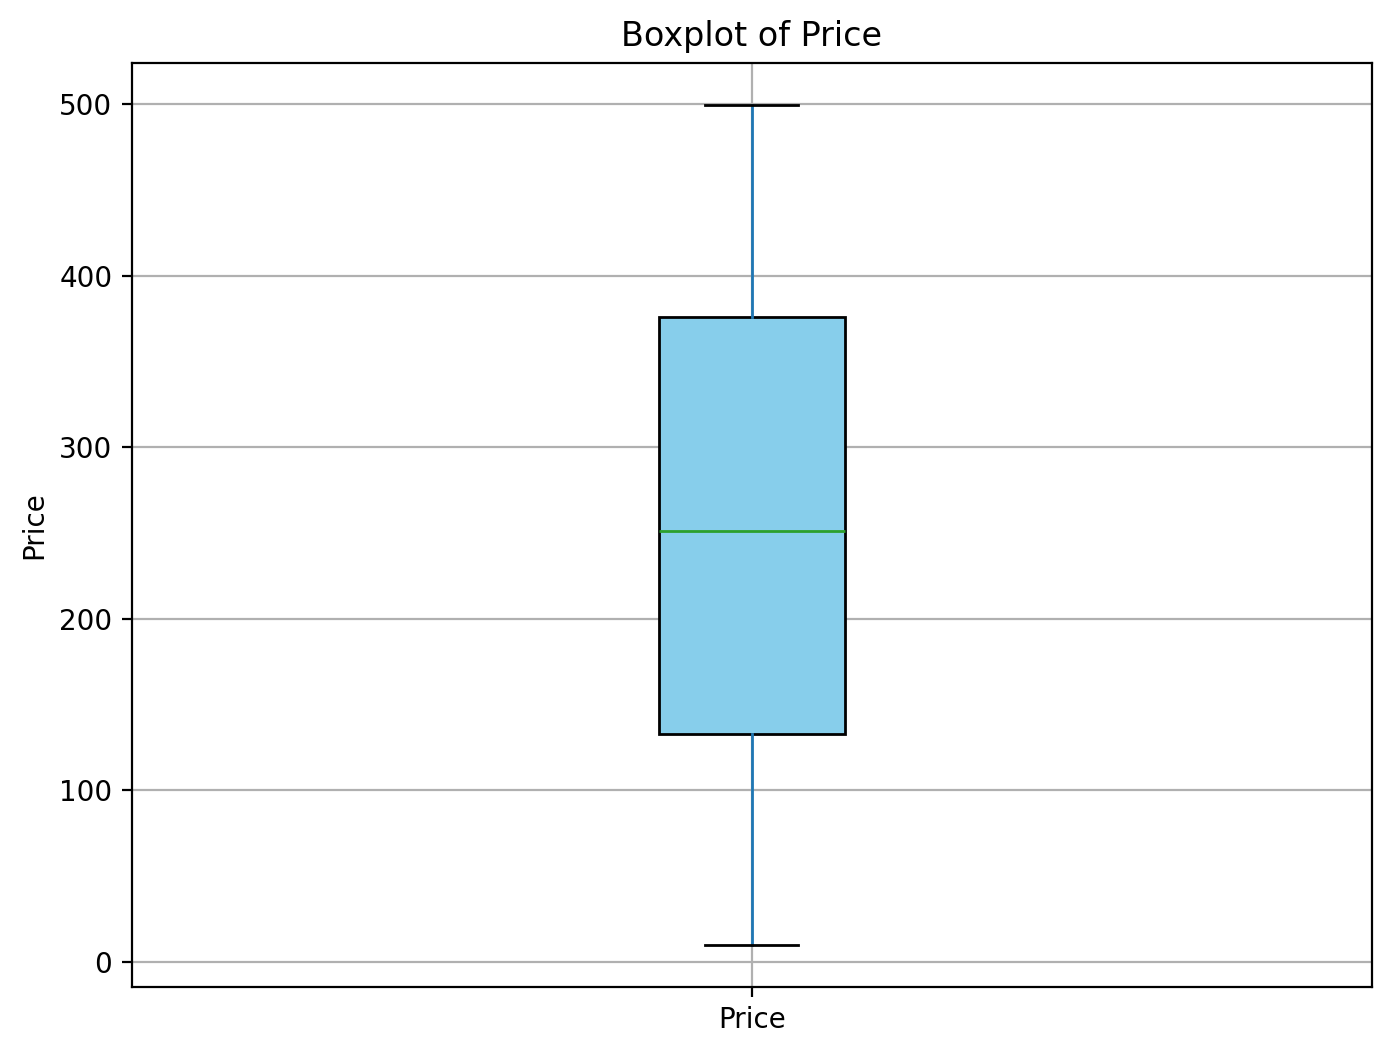

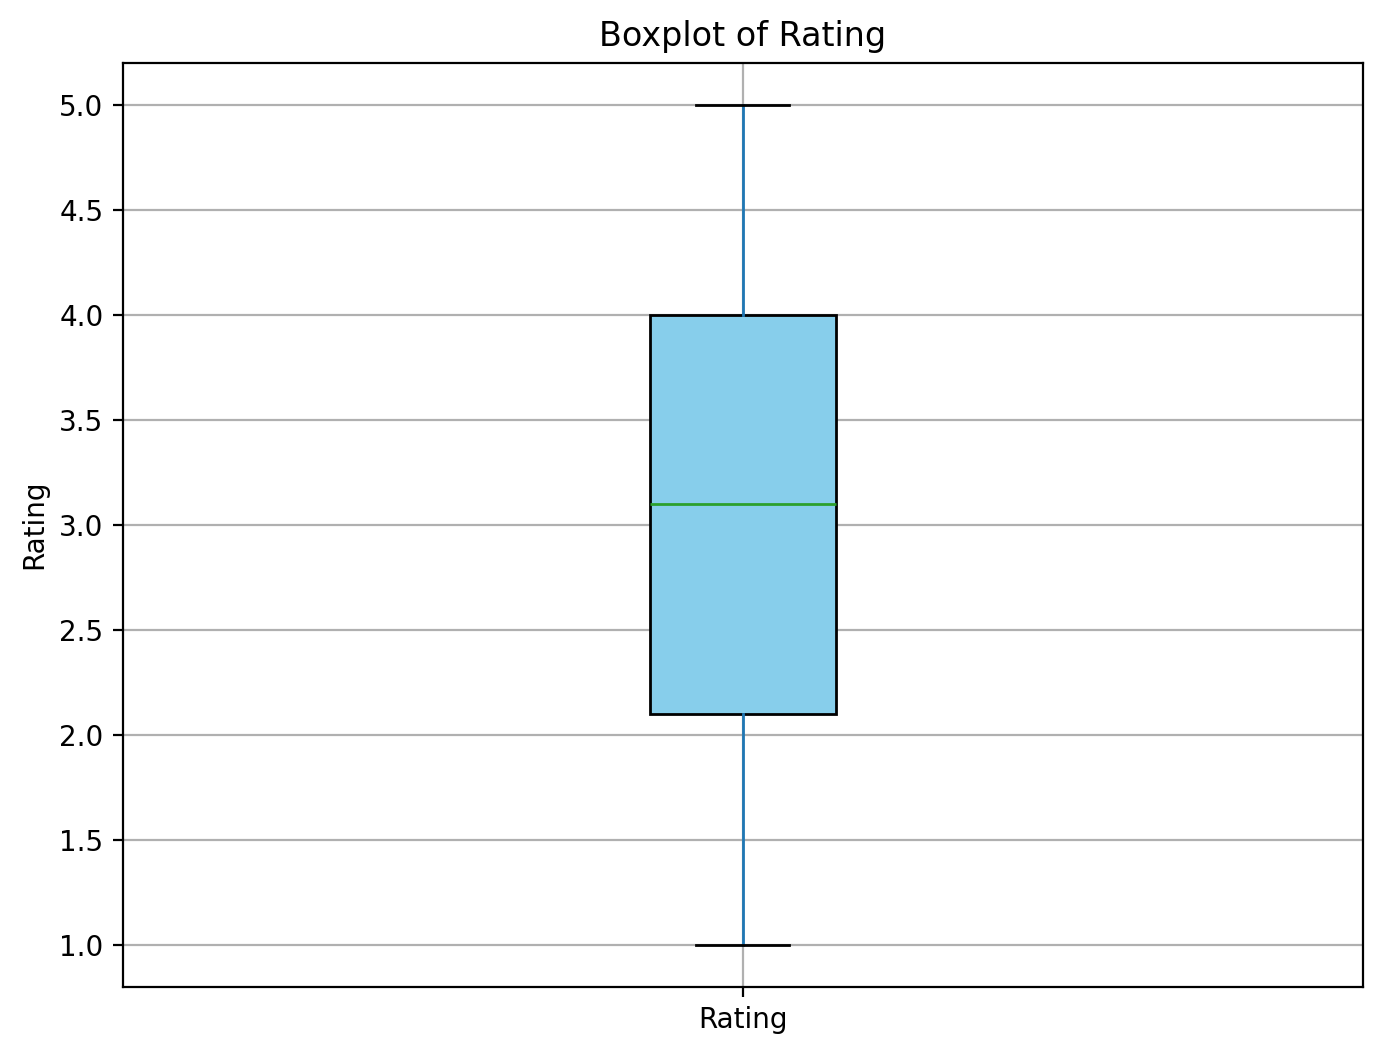

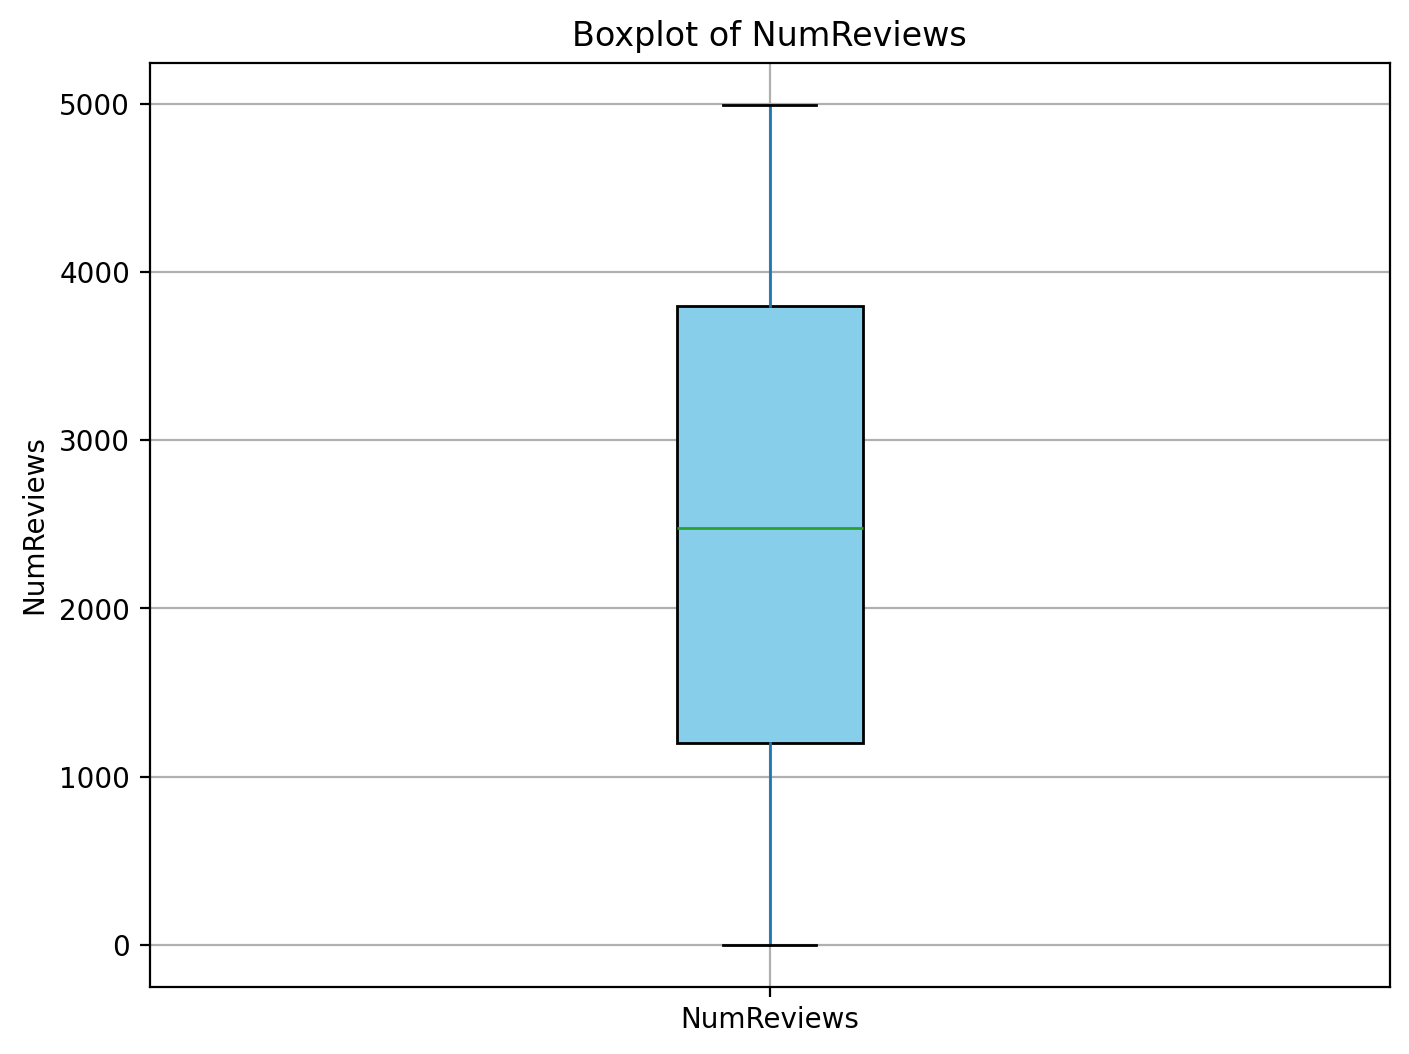

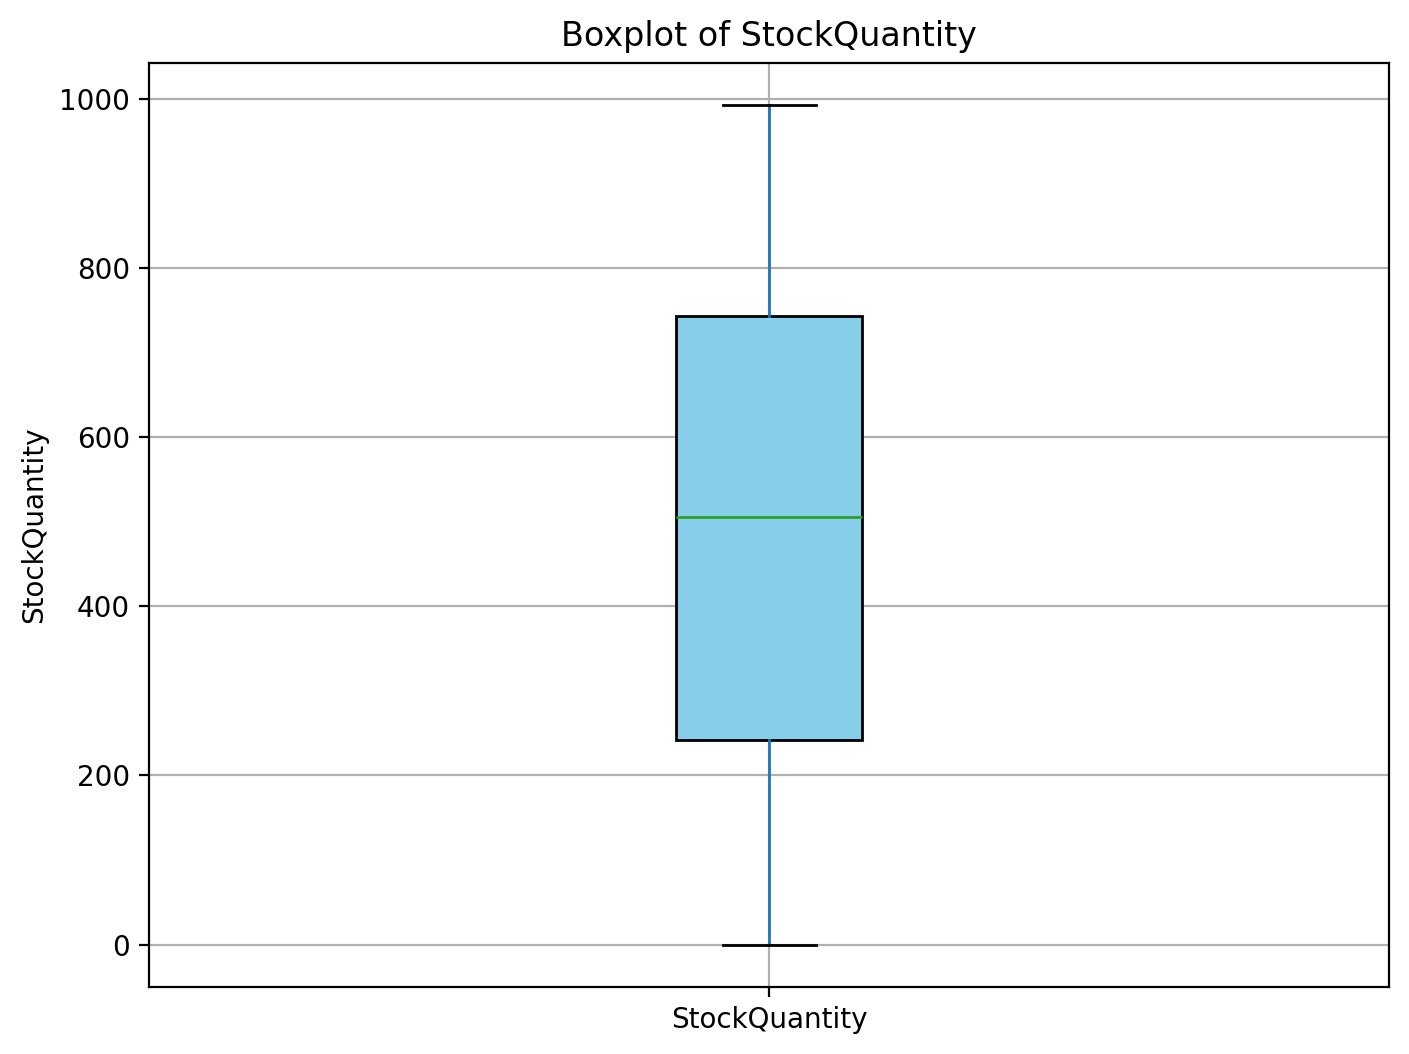

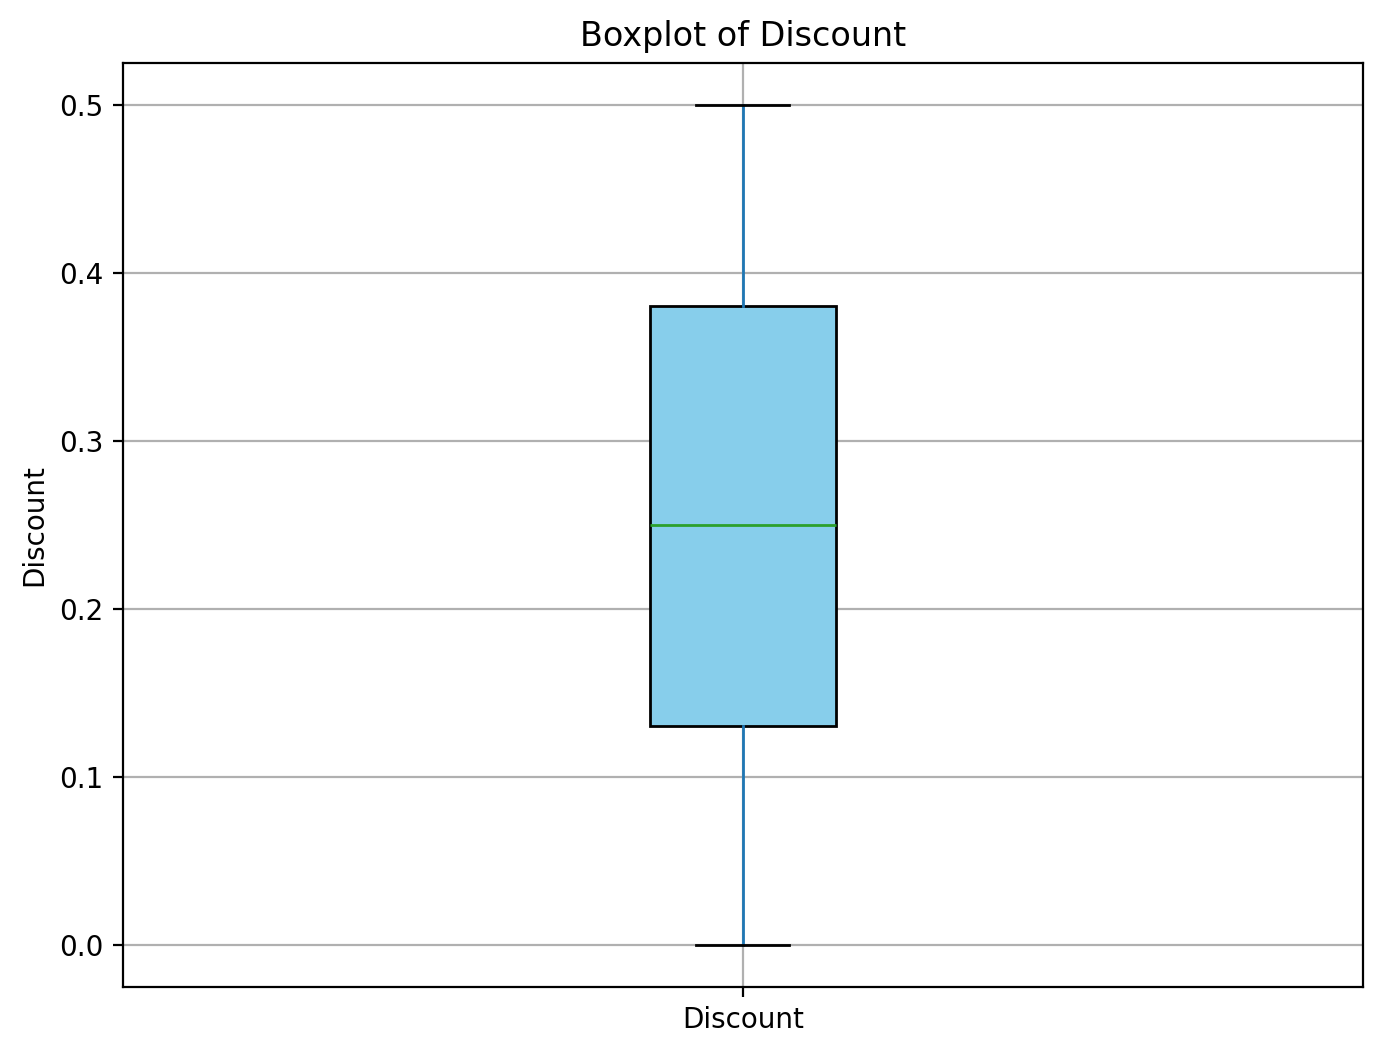

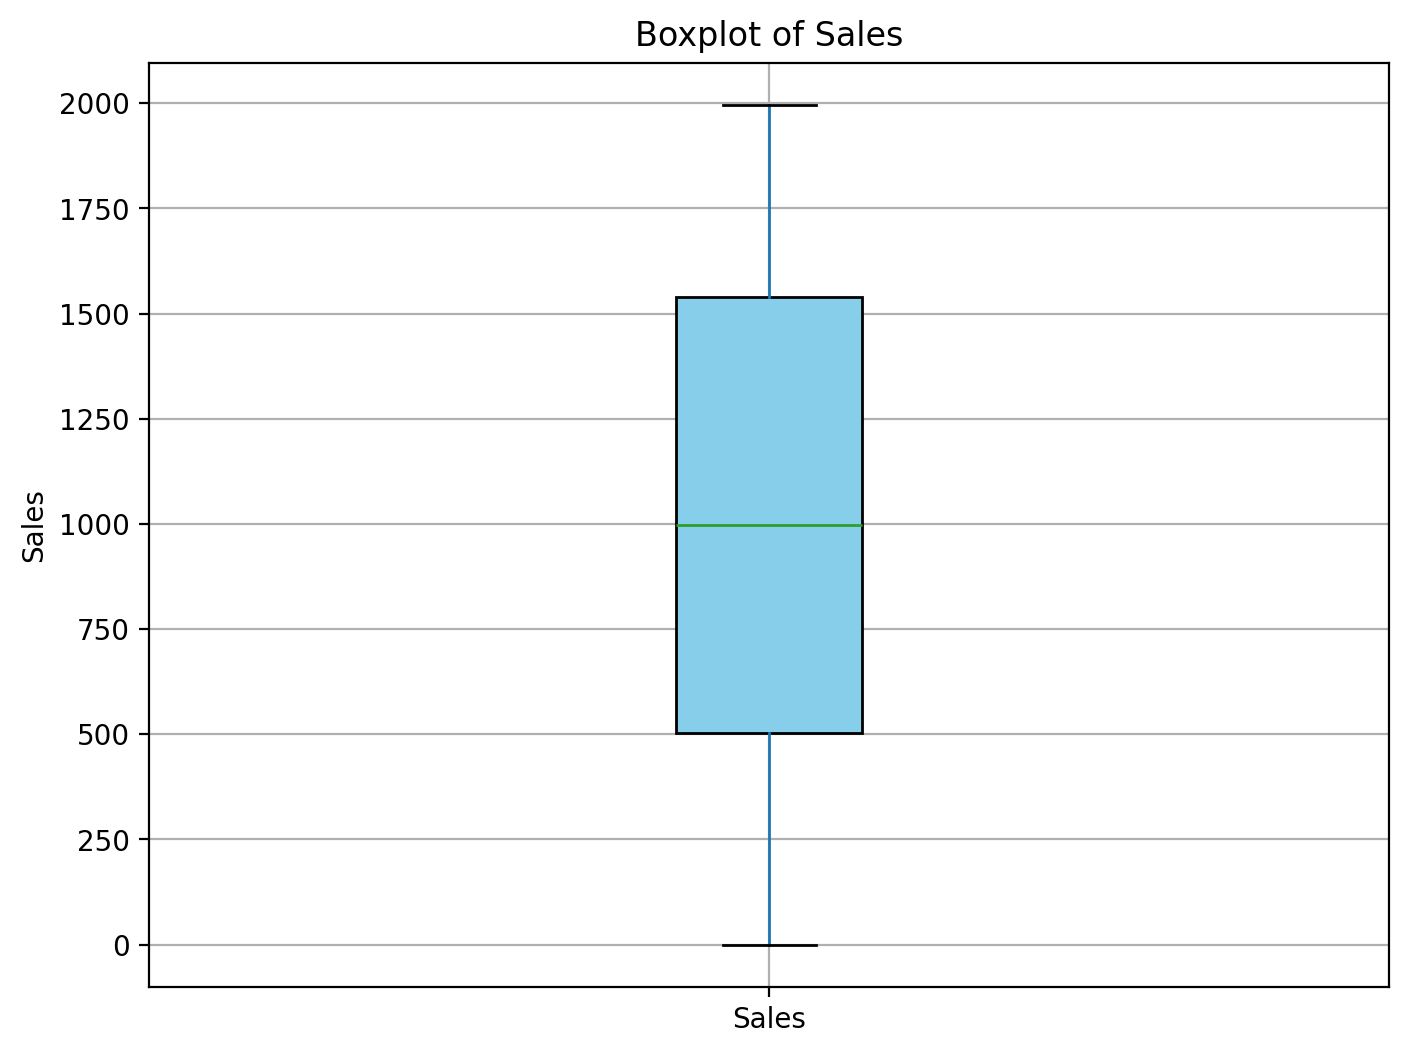

In [12]:

import matplotlib.pyplot as plt

# Create boxplots for each numerical column
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    boxplot = data.boxplot(column=column, patch_artist=True, boxprops=dict(facecolor='skyblue'))
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)
    plt.grid(True)
    plt.show()


In [15]:
# Define the target variable
target_column = 'Sales'

# Split the data into features (X) and target (y)
X = data.drop(columns=[target_column])
y = data[target_column]

print(y)

ProductID
1        466
2       1332
3        252
4       1806
5       1508
        ... 
996      325
997     1546
998     1295
999     1962
1000    1089
Name: Sales, Length: 1000, dtype: int64
